In [449]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [450]:
# Import packages
import sys
import os
import numpy as np
import pandas as pd
from scipy.stats import mode 
import matplotlib.pyplot as plt
import seaborn as sns
 # code starts here
from scipy import stats
from scipy.stats import kurtosis 
from sklearn.linear_model import LinearRegression
import datetime as dt
import re
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import ExtraTreeRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree  import ExtraTreeClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from itertools import product
from datetime import datetime
from sklearn import tree
import statsmodels.api as sm 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
np.set_printoptions(250) 
# import sklearn.external.joblib as extjoblib
# import joblib
import seaborn as sns

## 1. Read Data in a dataframe

In [451]:
import statsmodels.api as sm

# Read and Peak at Data
base_datapath = r"D://Projects//Python//Jupyter//Anands Notebook//Captstone//Data//Mahindra First Choice Dataset//"
cleansed_datapath = r"D://Projects//Python//Jupyter//Anands Notebook//Captstone//Data//Cleansed DataSet//"
customer_cleansed_datapath = cleansed_datapath + "Customer_Data.xlsx"
invoice_datapath = base_datapath + "Final_invoice.csv"
jtd_datapath = cleansed_datapath + "JTD.csv"
plantmaster_datapath = cleansed_datapath + "Plant Master.xlsx"


cleansed_invoice_datapath = cleansed_datapath + "Final_invoice.csv"

dir_of_interest = 'D://Projects//Python//GeneralFunctions'
sys.path.append(dir_of_interest)   
from EDA import *
#import EDA

In [452]:
dfInvoice = pd.read_csv(invoice_datapath)

#dfInvoice = pd.read_excel(invoice_datapath,sheet_name="Sheet1")

D:\Visual Studio\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [453]:
dfInvoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [454]:
dfInvoice.shape

(492314, 59)

## 2. Basic Data Exploration 

In [455]:
dir_of_interest = 'D:\\Projects\\Python\\GeneralFunctions'
sys.path.append(dir_of_interest)   

import EDA
from EDA import *
importlib.reload(EDA)
basicExploration(dfInvoice)

In basic exploration- Anand
-------- 0.1  Shape is--------------------------------
Rows:492314,Columns:59
-------- 0.2  Unique Values in dataframe are --------------------------------
Calculating Unique Values for DataFrame------------------
        Unique values for Column Unnamed: 0 is  492314 
        Unique values for Column Amt Rcvd From Custom is  1 
        Unique values for Column Amt Rcvd From Ins Co is  1 
        Unique values for Column Area / Locality is  65504 
        Unique values for Column CGST(14%) is  1 
        Unique values for Column CGST(2.5%) is  1 
        Unique values for Column CGST(6%) is  1 
        Unique values for Column CGST(9%) is  1 
        Unique values for Column CITY is  19580 
        Unique values for Column Cash /Cashless Type is  3 
        Unique values for Column Claim No. is  3767 
        Unique values for Column Cust Type is  7 
        Unique values for Column Customer No. is  253484 
        Unique values for Column District is  36 
 

       Area / Locality     CITY Cash /Cashless Type Claim No. Cust Type  \
count           468424   492313               27420      4804    492314   
unique           65504    19580                   3      3767         7   
top                  .  CHENNAI                CASH         1    Retail   
freq             27978    28740               22193       165    488995   

       Customer No.     District      Expiry Date   Gate Pass Date  \
count        492314       492314            22231            40915   
unique       253484           36             1133              423   
top           E4981  Maharashtra  15/07/2016 0:00  29/10/2015 0:00   
freq           2668       128119              136              363   

       Gate Pass Time  ...           Make   Model       Order Type   Plant  \
count          492314  ...         492314  490789           492314  492314   
unique          23874  ...             28     245                9     242   
top           0:00:00  ...  MARUTI SUZU

D:\Visual Studio\Anaconda3_64\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


## 3. Univariate Analysis 

### 3.1. Uniqueness Check

In [456]:
dir_of_interest = 'D://Projects//Python//GeneralFunctions'
sys.path.append(dir_of_interest)   
from EDA import *
dfUniqueness= unique_eliminateDataFrame(dfInvoice)
dfUniqueness

----------------In unique_eliminateDataFrame------------------


,Name,Unique,May Be Eliminated ?
0,Unnamed: 0,Yes,Yes
1,Amt Rcvd From Custom,Yes,Yes
2,Amt Rcvd From Ins Co,Yes,Yes
3,Area / Locality,No,No
4,CGST(14%),Yes,Yes
5,CGST(2.5%),Yes,Yes
6,CGST(6%),Yes,Yes
7,CGST(9%),Yes,Yes
8,CITY,No,No
9,Cash /Cashless Type,No,No


### 3.2.Perform Variance check
Assuming the Threshold percentage of Variance acceptable is 10%

In [457]:
lowVarianceCheck = lowVarianceEliminationDataFrameCheckOnThreshold(dfInvoice,0.1)
print(lowVarianceCheck)

----Following shows the variance in the features of the dataframe-------------
                    Name              Variance ? Can be Eliminated ?
0        Area / Locality  High variance in data                   No
1                   CITY  High variance in data                   No
2    Cash /Cashless Type  High variance in data                   No
3              Claim No.  High variance in data                   No
4              Cust Type   Low variance in data                  Yes
5           Customer No.  High variance in data                   No
6               District  High variance in data                   No
7            Expiry Date  High variance in data                   No
8         Gate Pass Date  High variance in data                   No
9         Gate Pass Time   Low variance in data                  Yes
10     Insurance Company  High variance in data                   No
11          Invoice Date  High variance in data                   No
12          Invoice Time

### 3.3.Perform Data Cleanup and Save to file system for later use

Null Check says - 

                      Total     Percent
Unnamed: 0                 0    0.000000
Amt Rcvd From Custom  197286   40.073205
Amt Rcvd From Ins Co  197286   40.073205
Area / Locality        23890    4.852594
CGST(14%)             197286   40.073205
CGST(2.5%)            197286   40.073205
CGST(6%)              197286   40.073205
CGST(9%)              197286   40.073205
CITY                       1    0.000203
Cash /Cashless Type   464894   94.430384
Claim No.             487510   99.024200
Cust Type                  0    0.000000
Customer No.               0    0.000000
District                   0    0.000000
Expiry Date           470083   95.484386
Gate Pass Date        451399   91.689247
Gate Pass Time             0    0.000000
IGST(12%)             197286   40.073205
IGST(18%)             197286   40.073205
IGST(28%)             197286   40.073205
IGST(5%)              197286   40.073205
Insurance Company     468723   95.208140
Invoice Date               0    0.000000
Invoice No                 0    0.000000
Invoice Time               0    0.000000
Job Card No                0    0.000000
JobCard Date               0    0.000000
JobCard Time               0    0.000000
KMs Reading                0    0.000000
Labour Total               0    0.000000
Make                       0    0.000000
Misc Total                 0    0.000000
Model                   1525    0.309762
ODN No.               197286   40.073205
OSL Total                  0    0.000000
Order Type                 0    0.000000
Outstanding Amt       197286   40.073205
Parts Total                0    0.000000
Pin code                   0    0.000000
Plant                      0    0.000000
Plant Name1                0    0.000000
Policy no.            475432   96.570888
Print Status               0    0.000000
Recovrbl Exp               0    0.000000
Regn No                   16    0.003250
SGST/UGST(14%)        197286   40.073205
SGST/UGST(2.5%)       197286   40.073205
SGST/UGST(6%)         197286   40.073205
SGST/UGST(9%)         197286   40.073205
Service Advisor Name  492314  100.000000
TDS amount            197286   40.073205
Technician Name       236834   48.106290
Total Amt Wtd Tax.         0    0.000000
Total CGST            197286   40.073205
Total GST             197286   40.073205
Total IGST            197286   40.073205
Total SGST/UGST       197286   40.073205
Total Value           197286   40.073205
User ID                    0    0.000000



Hence from the above, we have only 2.5 % values for Marital Status,Occupation, Date of Birth and Death Date. Also title has a very low variance. We can plan to drop the same.

In [458]:
# dfInvoice = dfInvoice.drop(["Title","Marital Status","Occupation","Date of Birth","Death date"],axis=1)
# dfInvoice.shape

In [459]:
# dfInvoice.to_excel(cleaned_invoice_datapath, index=False) 

In [460]:
dfInvoice.District.value_counts()

Maharashtra             128119
Tamil Nadu              116309
Karnataka                44135
Andhra Pradesh           40604
Uttar Pradesh            31534
Gujarat                  24403
Punjab                   22741
Haryana                  17971
Madhya Pradesh           13598
Rajasthan                13466
Telangana                 7741
Kerala                    6002
Delhi                     5414
Chandigarh                3319
Himachal Pradesh          3316
Bihar                     3258
Uttarakhand               2541
Odisha                    2305
Puducherry                1716
West Bengal               1332
Dadra and Nagar Hav.       907
Chhattisgarh               622
Daman and Diu              436
Jharkhand                  256
Assam                      100
Arunachal Pradesh           62
Nagaland                    24
Goa                         24
Jammu and Kashmir           21
Andaman and Nico.In.         8
Lakshadweep                  7
Megalaya                     7
Sikkim  

In [461]:
dfInvoice.shape

(492314, 59)

## 1. Which District have most cars coming for repair based on the Make and Model ?

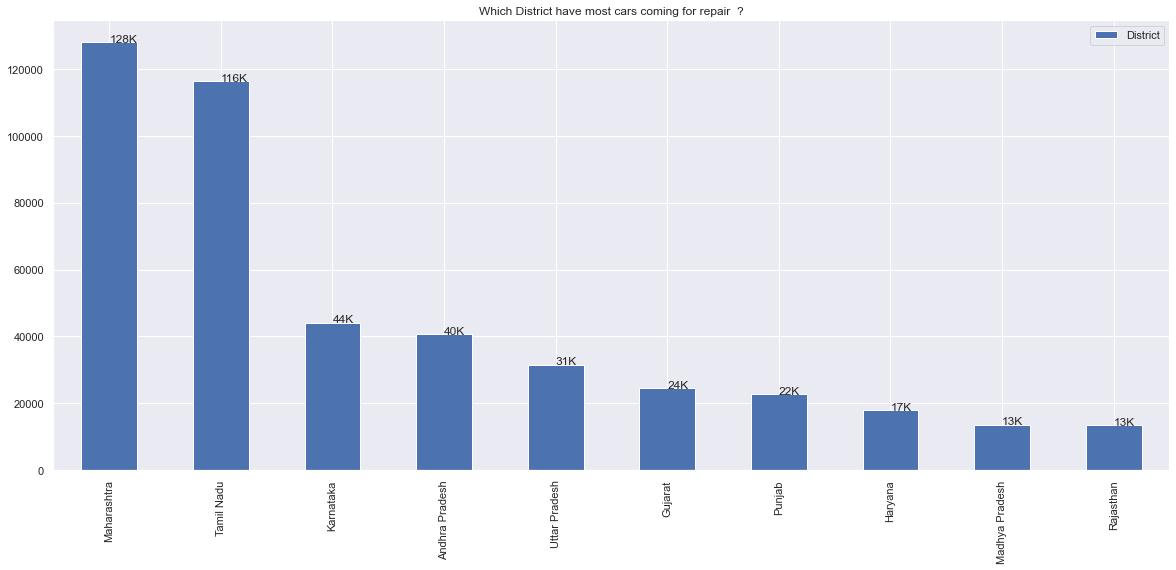

In [462]:
sns.set(rc={'figure.figsize':(20,8.27)})
dfInvoice["Make Copy"] = dfInvoice["Make"]
DistrictBasedOnMakeSeries = dfInvoice["District"].value_counts()
DistrictBasedOnMakeSeries[:10].plot.bar()
plt.title('Which District have most cars coming for repair  ?')

for num, counts in enumerate(DistrictBasedOnMakeSeries[:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.legend()
plt.show()
dfInvoice.drop(["Make Copy"],inplace=True,axis=1)

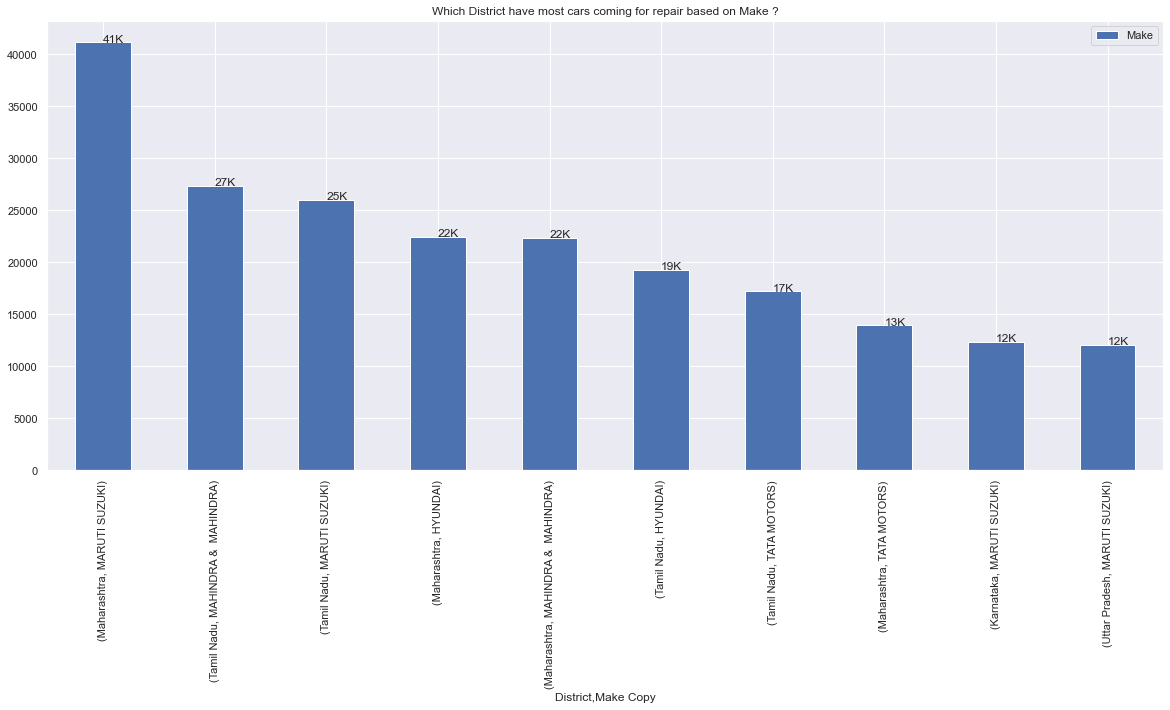

In [463]:
sns.set(rc={'figure.figsize':(20,8.27)})
dfInvoice["Make Copy"] = dfInvoice["Make"]
DistrictBasedOnMakeSeries = dfInvoice.groupby(["District","Make Copy"])[["Make"]].count().sort_values("Make", ascending=False)
DistrictBasedOnMakeSeries[:10].plot.bar()
plt.title('Which District have most cars coming for repair based on Make ?')

for num, counts in enumerate(DistrictBasedOnMakeSeries["Make"][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.legend()
plt.show()
dfInvoice.drop(["Make Copy"],inplace=True,axis=1)

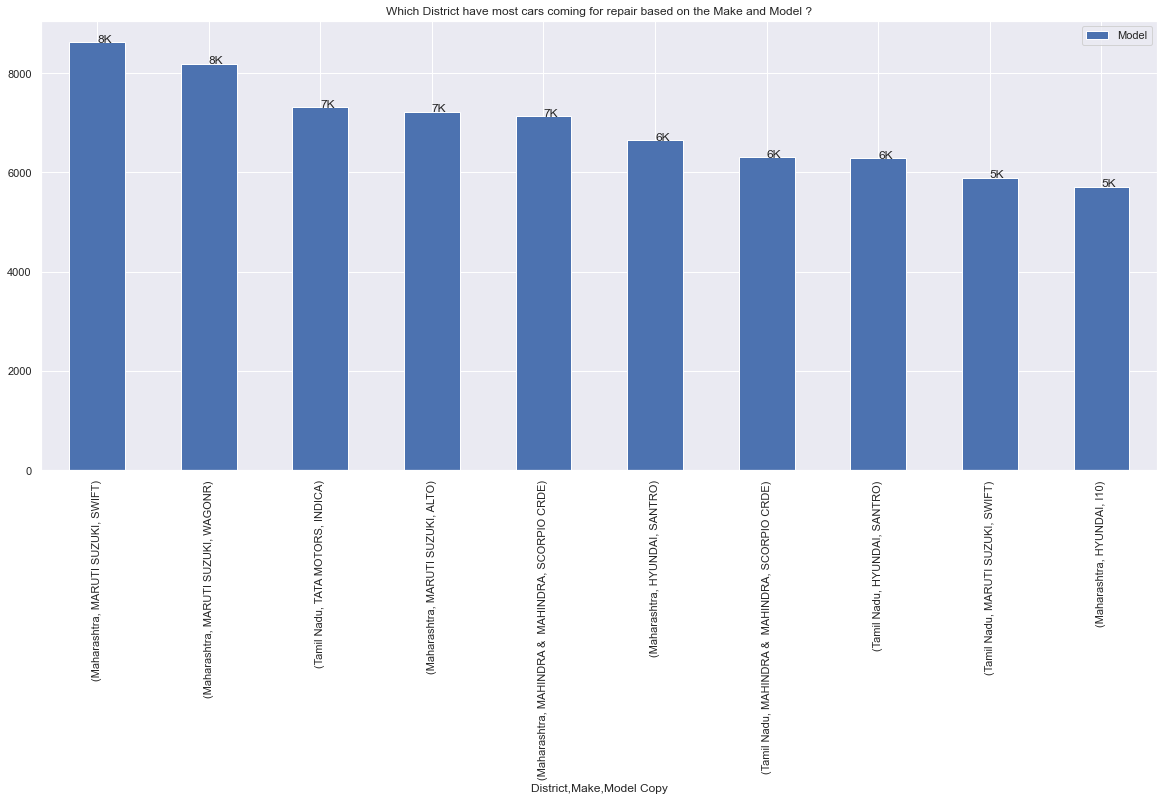

In [464]:
sns.set(rc={'figure.figsize':(20,8.27)})
dfInvoice["Model Copy"] = dfInvoice["Model"]
DistrictMakeBasedOnModelSeries = dfInvoice.groupby(["District","Make","Model Copy"])[["Model"]].count().sort_values("Model", ascending=False)
DistrictMakeBasedOnModelSeries[:10].plot.bar()
plt.title('Which District have most cars coming for repair based on the Make and Model ?')

for num, counts in enumerate(DistrictMakeBasedOnModelSeries["Model"][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.legend()
plt.show()
dfInvoice.drop(["Model Copy"],inplace=True,axis=1)

## 2. Which Make and Model come for repairs the most (most popular)?

In [465]:
dfInvoice["Model Name"]= dfInvoice["Model"]
DistrictMakeSeries = dfInvoice.groupby(["District","Make","Model"])[["Model Name"]].count().sort_values("Model", ascending=False)
DistrictMakeSeries

,,,Model Name
District,Make,Model,
Andhra Pradesh,TATA MOTORS,ZEST,32
Uttar Pradesh,TATA MOTORS,ZEST,17
Maharashtra,TATA MOTORS,ZEST,28
Uttarakhand,TATA MOTORS,ZEST,9
Odisha,TATA MOTORS,ZEST,8
...,...,...,...
West Bengal,TATA MOTORS,207,2
Madhya Pradesh,TATA MOTORS,207,4
Punjab,TATA MOTORS,207,1


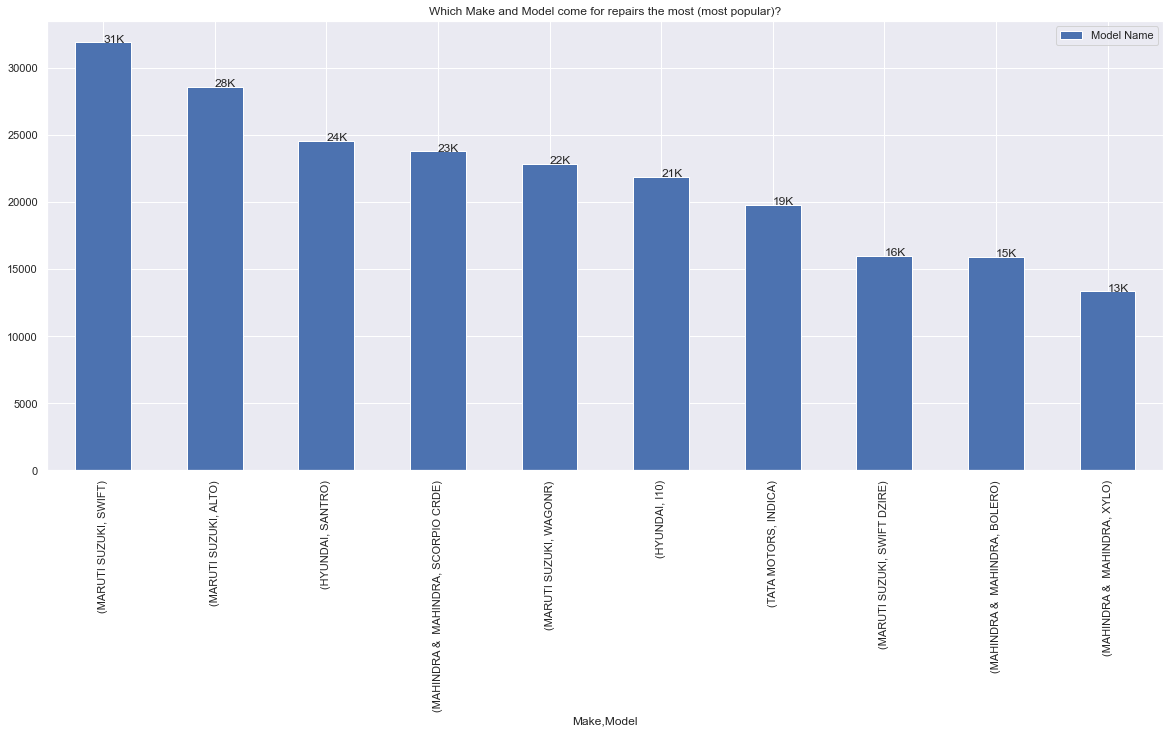

In [466]:
sns.set(rc={'figure.figsize':(20,8.27)})
MakeModelBasedOnModelNameSeries = dfInvoice.groupby(["Make","Model"])[["Model Name"]].count().sort_values("Model Name", ascending=False)
MakeModelBasedOnModelNameSeries[:10].plot.bar()
plt.title('Which Make and Model come for repairs the most (most popular)?')

for num, counts in enumerate(MakeModelBasedOnModelNameSeries["Model Name"][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")



plt.legend()
plt.show()
dfInvoice.drop(["Model Name"],inplace=True,axis=1)

## 3. What is the Overall general service structure ?

In [467]:
 dfInvoice["Order Type"].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

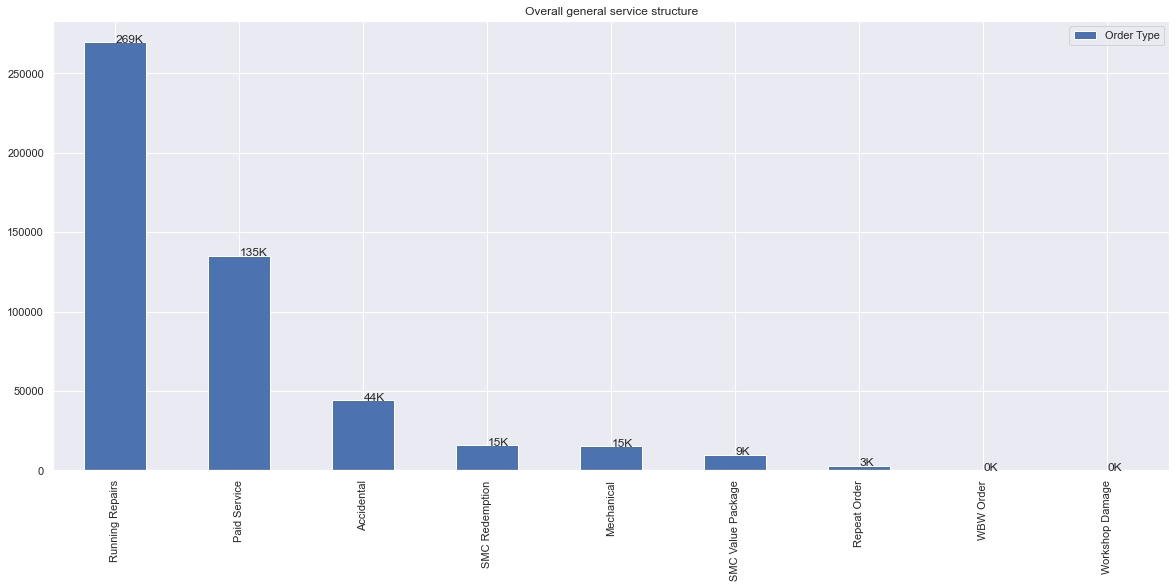

In [468]:
sns.set(rc={'figure.figsize':(20,8.27)})
OrderTypeSeries = dfInvoice["Order Type"].value_counts()
OrderTypeSeries[:30].plot.bar()
plt.title('Overall general service structure')

for num, counts in enumerate(OrderTypeSeries[:30]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")



plt.legend()
plt.show()

## 4. What is service structure for particular make/model/car?

In [469]:
dfInvoice["Order Type Copy"]= dfInvoice["Order Type"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
MakeModelBasedOnOrderTypeSeries = dfInvoice.groupby(["Order Type","Make","Model"])[["Order Type Copy"]].count().sort_values("Order Type Copy", ascending=False).reset_index()

MakeModelBasedOnOrderTypeSeries = MakeModelBasedOnOrderTypeSeries.groupby(["Order Type"]).max()
dfInvoice.drop(["Order Type Copy"],inplace=True,axis=1)
MakeModelBasedOnOrderTypeSeries = MakeModelBasedOnOrderTypeSeries.rename(columns={"Order Type Copy":"Count"}).sort_values(["Count"])
MakeModelBasedOnOrderTypeSeries



,Make,Model,Count
Order Type,,,
WBW Order,TOYOTA,XUV 500,2
Workshop Damage,TATA MOTORS,WAGONR,4
Repeat Order,VOLKSWAGEN,ZEN ESTILO,210
SMC Value Package,VOLKSWAGEN,ZEN ESTILO,939
Mechanical,VOLKSWAGEN,ZEST,992
SMC Redemption,VOLKSWAGEN,ZEN ESTILO,1552
Accidental,VOLVO,ZEST,3402
Paid Service,VOLVO,ZEST,8727
Running Repairs,VOLVO,ZEST,16777


## 5. Age group of Owners and service based on the age group.

### ----------------------------We have very less data for Customers age.

In [470]:
incomePerOrderType = dfInvoice.groupby(["Order Type"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False)
incomePerOrderType

,Order Type,Total Value
4,Running Repairs,4.425518e+08
0,Accidental,4.414085e+08
2,Paid Service,3.873247e+08
6,SMC Value Package,3.050636e+07
5,SMC Redemption,1.674224e+06
3,Repeat Order,4.006740e+03
1,Mechanical,0.000000e+00
7,WBW Order,0.000000e+00
8,Workshop Damage,0.000000e+00


## 6. What is the Income per Order/Service Type?

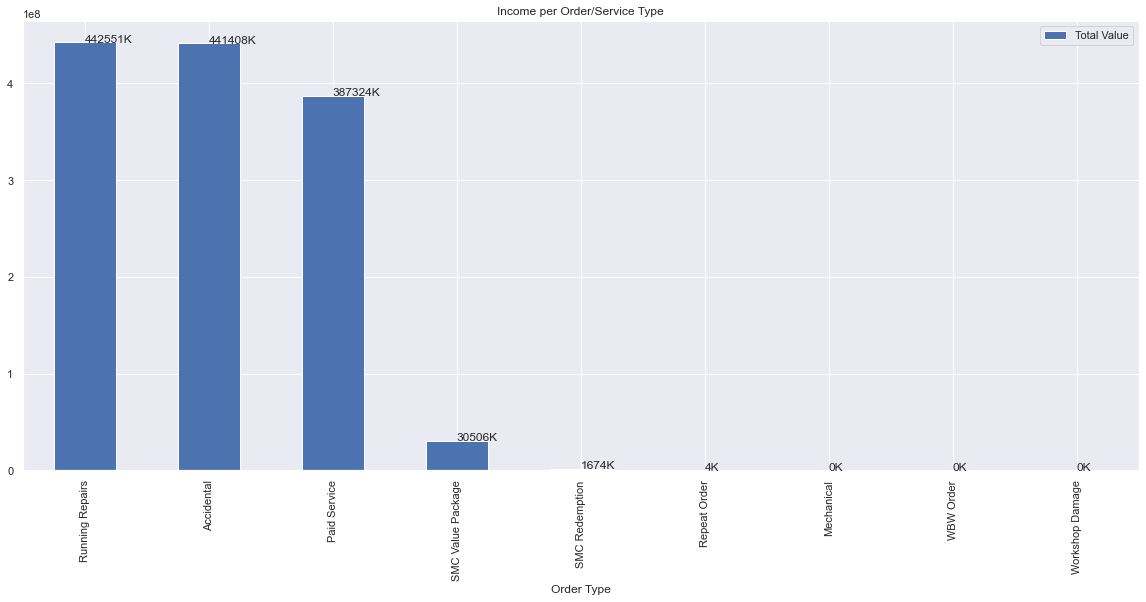

In [471]:
dfInvoice['Total Value'] = dfInvoice['Total Value'].fillna(0)
sns.set(rc={'figure.figsize':(20,8.27)})
incomePerOrderType = dfInvoice.groupby(["Order Type"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Order Type")
incomePerOrderType[:30].plot.bar()

for num, counts in enumerate(incomePerOrderType['Total Value'][:30]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")


plt.title('Income per Order/Service Type')
plt.legend()
plt.show()


## 7. Services done based on  KM's run

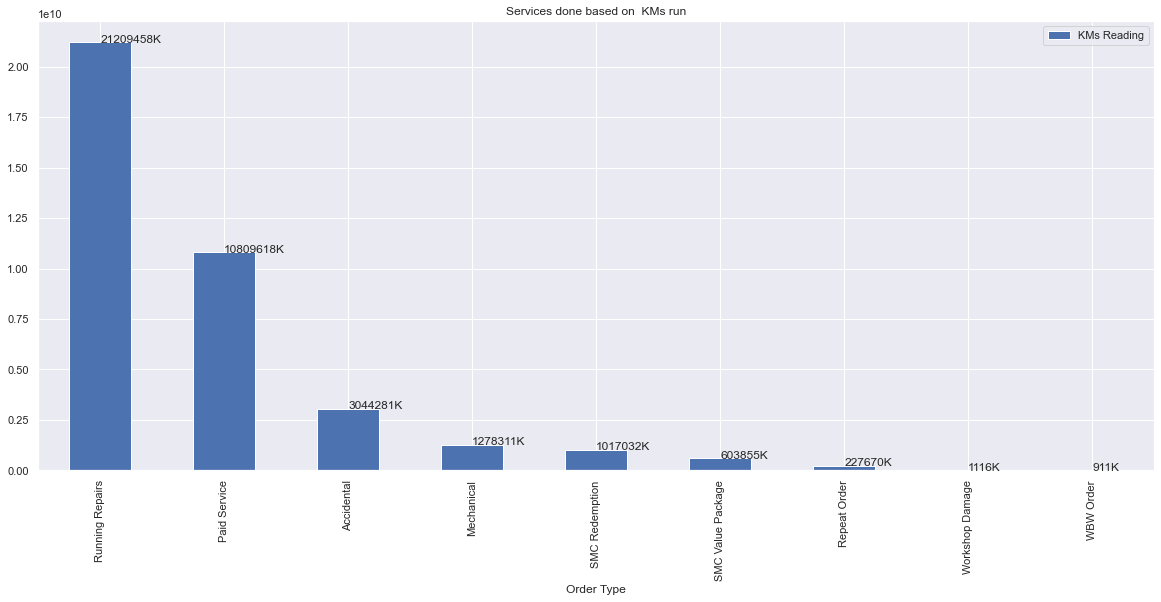

In [472]:
sns.set(rc={'figure.figsize':(20,8.27)})
servicesBasedOnKmPerOrderType = dfInvoice.groupby(["Order Type"])['KMs Reading'].sum().reset_index().sort_values("KMs Reading", ascending=False).set_index("Order Type")
servicesBasedOnKmPerOrderType[:30].plot.bar()

for num, counts in enumerate(servicesBasedOnKmPerOrderType['KMs Reading'][:30]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")


plt.title('Services done based on  KMs run')
plt.legend()
plt.show()


## 8. Which insurance companies are used the most ? Nationwise 

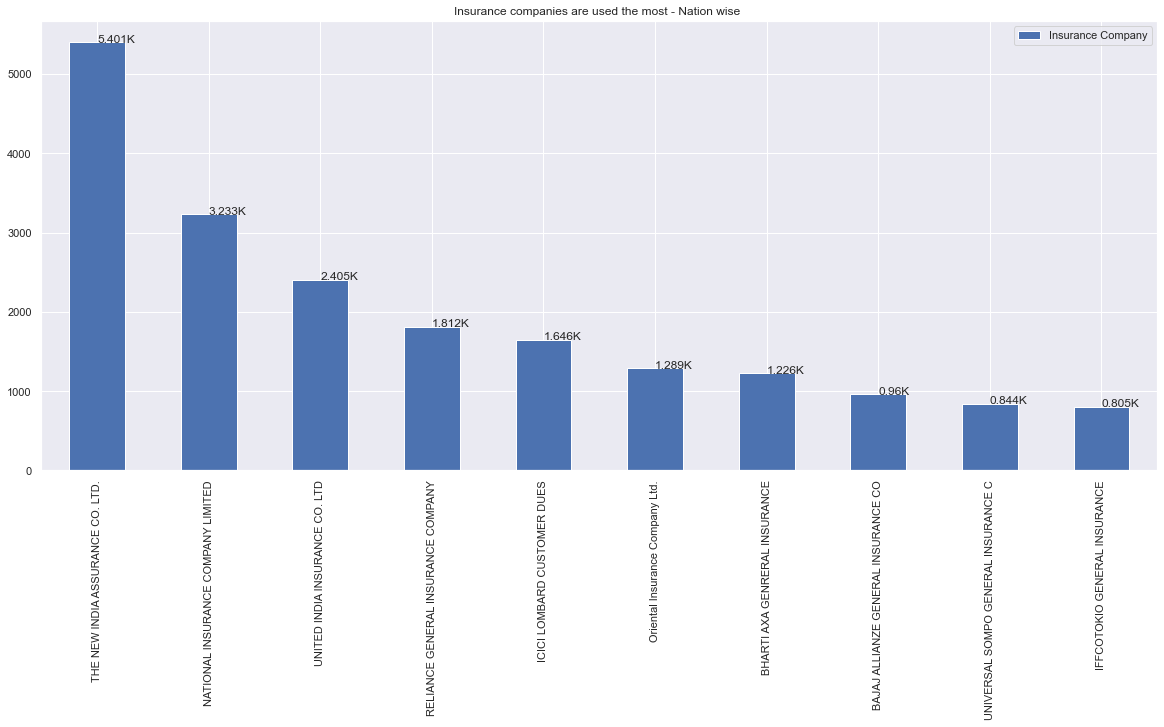

In [473]:
insuranceCoUsedMost = dfInvoice["Insurance Company"].value_counts()
sns.set(rc={'figure.figsize':(20,8.27)})
insuranceCoUsedMost[:10].plot.bar()
plt.title('Insurance companies are used the most - Nation wise ')

for num, counts in enumerate(insuranceCoUsedMost[:10]):
    plt.text(num, counts, s = format((np.round(counts)/1000)) + "K")

plt.legend()
plt.show()

## 9. Which insurance companies are used the most ? Districtwise

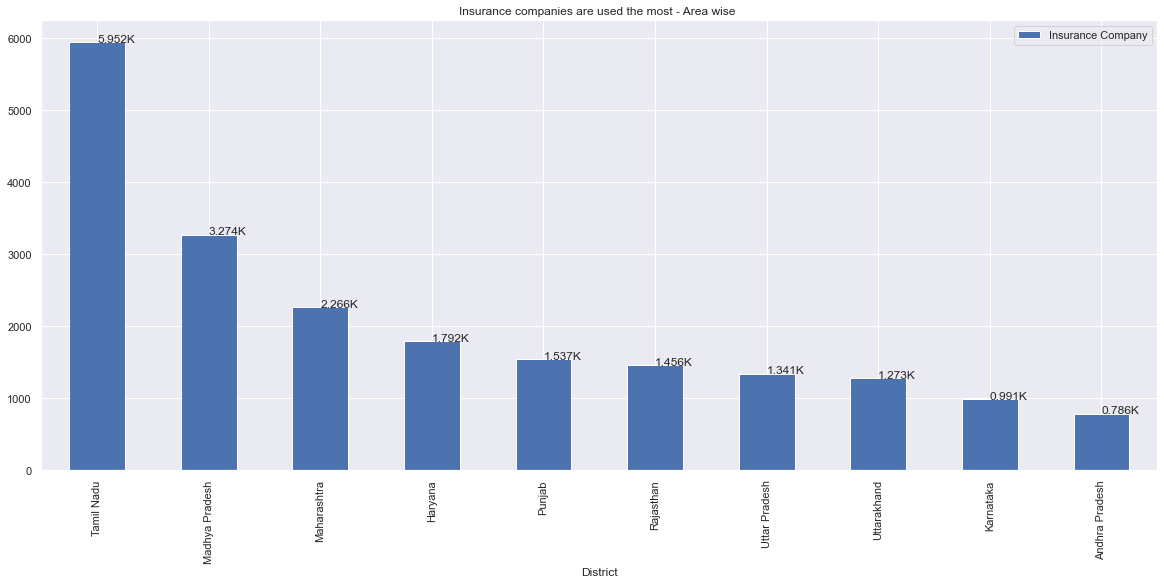

In [474]:
sns.set(rc={'figure.figsize':(20,8.27)})
dfInvoice['Insurance Company Copy'] = dfInvoice['Insurance Company']
insuranceCoUsedMostDistrictWise = dfInvoice.groupby(["District"])[['Insurance Company']].count().sort_values("Insurance Company", ascending=False)
#MakeModelBasedOnOrderTypeSeries = dfInvoice.groupby(["Order Type Copy","Make","Model"])[["Order Type"]].count().sort_values("Order Type", ascending=False)
insuranceCoUsedMostDistrictWise[:10].plot.bar()
plt.title('Insurance companies are used the most - Area wise ')

for num, counts in enumerate(insuranceCoUsedMostDistrictWise["Insurance Company"][:10]):
    plt.text(num, counts, s = format((np.round(counts)/1000)) + "K")

plt.legend()
plt.show()
dfInvoice.drop(["Insurance Company Copy"],inplace=True,axis=1)


## 10. Which insurance companies are used the most ? Districtwise and Insurance Company wise

In [475]:
dfInvoice.shape

(492314, 59)

In [476]:
dfInvoice['Insurance Company'].value_counts(normalize=True)*100

THE NEW INDIA ASSURANCE CO. LTD.       22.894324
NATIONAL INSURANCE COMPANY LIMITED     13.704379
UNITED INDIA INSURANCE CO. LTD         10.194566
RELIANCE GENERAL INSURANCE COMPANY      7.680895
ICICI LOMBARD CUSTOMER DUES             6.977237
Oriental Insurance Company Ltd.         5.463948
BHARTI AXA GENRERAL INSURANCE           5.196897
BAJAJ ALLIANZE GENERAL INSURANCE CO     4.069348
UNIVERSAL SOMPO GENERAL INSURANCE C     3.577636
IFFCOTOKIO GENERAL INSURANCE            3.412318
TATA AIG GENERAL INSURANCE CO. LTD.     3.352974
HDFC ERGO                               3.094400
CHOLAMANDALAM GENERAL INSURANCE CO.     2.895172
ROYAL SUNDARAM GENERAL                  2.077063
Future Generali India Ins. Co Ltd       1.750668
SBI General Insurance Company Ltd.      1.390361
L&T INSURANCE                           0.983426
Magma HDI General Insurance Co Ltd      0.466280
Kotak Mahindra General Insurance Lt     0.292484
LIBERTY VIDEOCON GENERAL INSURANCE      0.275529
Corporate Warranties

In [477]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dfInvoice['Insurance Company Copy'] = dfInvoice['Insurance Company']
insuranceCoUsedMostDistrictWise = dfInvoice.groupby(["District",'Insurance Company'])[['Insurance Company Copy']].count().sort_values(["Insurance Company Copy"], ascending=False)
dfInvoice.drop(["Insurance Company Copy"],inplace=True,axis=1)
insuranceCoUsedMostDistrictWise


,,Insurance Company Copy
District,Insurance Company,
Tamil Nadu,THE NEW INDIA ASSURANCE CO. LTD.,1268
Madhya Pradesh,THE NEW INDIA ASSURANCE CO. LTD.,894
Tamil Nadu,UNITED INDIA INSURANCE CO. LTD,663
Maharashtra,THE NEW INDIA ASSURANCE CO. LTD.,594
Tamil Nadu,RELIANCE GENERAL INSURANCE COMPANY,575
...,...,...
Kerala,RELIANCE GENERAL INSURANCE COMPANY,1
Daman and Diu,UNITED INDIA INSURANCE CO. LTD,1
Maharashtra,Kotak Mahindra General Insurance Lt,1


In [478]:
dfInvoice.shape

(492314, 59)

## 11. Highest Service done based on Area

In [479]:
dfInvoice.groupby(["District"])['Order Type'].count()

District
Andaman and Nico.In.         8
Andhra Pradesh           40604
Arunachal Pradesh           62
Assam                      100
Bihar                     3258
Chandigarh                3319
Chhattisgarh               622
Dadra and Nagar Hav.       907
Daman and Diu              436
Delhi                     5414
Goa                         24
Gujarat                  24403
Haryana                  17971
Himachal Pradesh          3316
Jammu and Kashmir           21
Jharkhand                  256
Karnataka                44135
Kerala                    6002
Lakshadweep                  7
Madhya Pradesh           13598
Maharashtra             128119
Manipur                      3
Megalaya                     7
Mizoram                      2
Nagaland                    24
Odisha                    2305
Puducherry                1716
Punjab                   22741
Rajasthan                13466
Sikkim                       6
Tamil Nadu              116309
Telangana                 7741

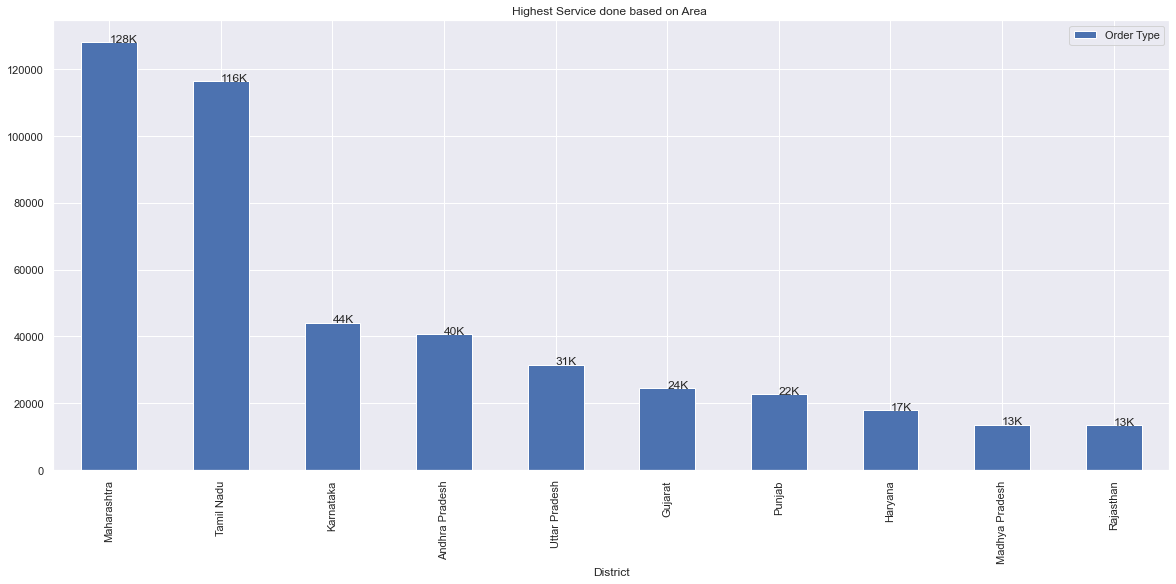

In [480]:
sns.set(rc={'figure.figsize':(20,8.27)})
servicesBasedOnArea = dfInvoice.groupby(["District"])['Order Type'].count().reset_index().sort_values("Order Type", ascending=False).set_index("District")
servicesBasedOnArea[:10].plot.bar()
plt.title('Highest Service done based on Area ')

for num, counts in enumerate(servicesBasedOnArea['Order Type'][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.legend()
plt.show()


## 12. Analysis of Outsourced Labour counts based on the nation

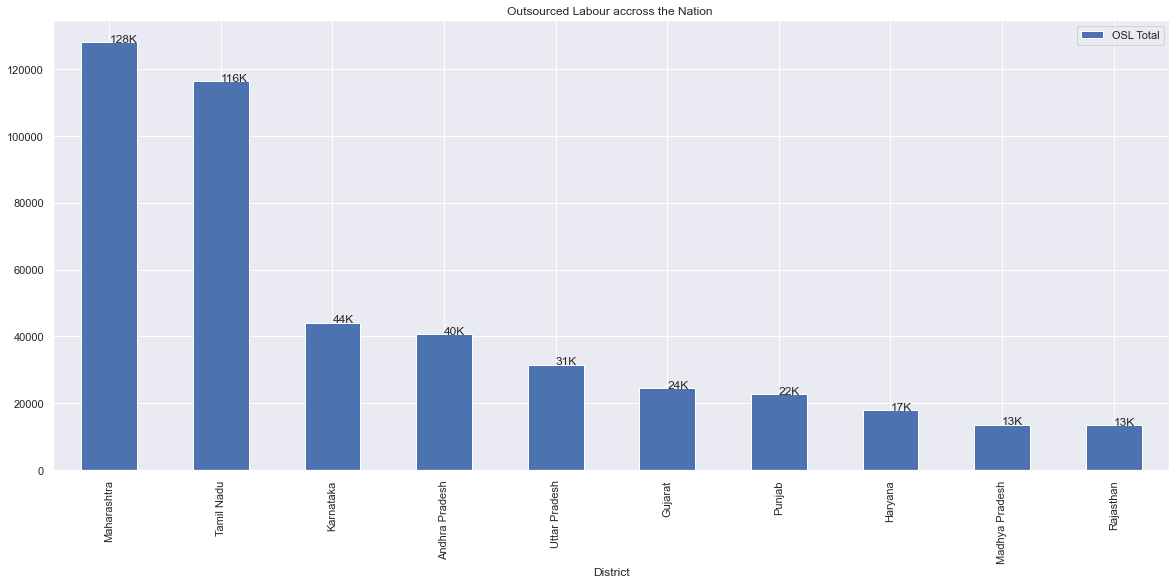

In [481]:
sns.set(rc={'figure.figsize':(20,8.27)})
outsourcedLabourBasedOnNation = dfInvoice.groupby(["District"])['OSL Total'].count().reset_index().sort_values("OSL Total", ascending=False).set_index("District")
outsourcedLabourBasedOnNation[:10].plot.bar()
plt.title('Outsourced Labour accross the Nation ')

for num, counts in enumerate(outsourcedLabourBasedOnNation['OSL Total'][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")


plt.legend()
plt.show()


## 13. What are the different types of services provided per District?

In [482]:
servicesBasedOnArea = dfInvoice.groupby(["District",'Order Type'])[['Order Type']].count()
servicesBasedOnArea

Order Type
District             Order Type                 
Andaman and Nico.In. Accidental                2
                     Paid Service              1
                     Running Repairs           5
Andhra Pradesh       Accidental             4372
                     Mechanical              830
...                                          ...
Uttarakhand          WBW Order                 2
West Bengal          Accidental               77
                     Mechanical               21
                     Paid Service            197
                     Running Repairs        1037

[201 rows x 1 columns]

## 14. Are the service seasonal or regular?

## Convert Job Dates to Season

In [483]:
import re
import datetime



def get_season(row):
    row = datetime.datetime.strptime(row, '%d/%m/%Y')
    month = row.month 
    if month >= 1 and month < 3:
        return 'Winter'
    elif month >= 3 and month < 6:
        return 'Summer'
    elif month >= 6 and month < 10:
        return 'Rainy'
    else:
        return 'Winter'
    
dfInvoice['Season'] = dfInvoice['JobCard Date'].map(get_season)
dfInvoice[["JobCard Date","Season"]]

,JobCard Date,Season
0,13/12/2014,Winter
1,02/01/2015,Winter
2,02/01/2015,Winter
3,03/01/2015,Winter
4,02/01/2015,Winter
...,...,...
492309,30/06/2016,Rainy
492310,30/06/2016,Rainy
492311,30/06/2016,Rainy
492312,30/06/2016,Rainy


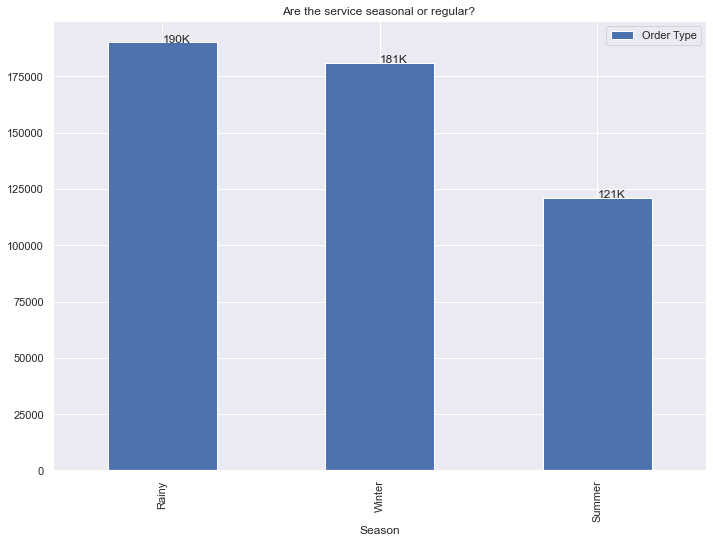

In [484]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
servicesBasedOnSeason = dfInvoice.groupby(["Season"])['Order Type'].count().reset_index().sort_values("Order Type", ascending=False).set_index("Season")
servicesBasedOnSeason[:30].plot.bar()
plt.title('Are the service seasonal or regular? ')

for num, counts in enumerate(servicesBasedOnSeason['Order Type'][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")


plt.legend()
plt.show()

## 15. Which season gives highest revenue?

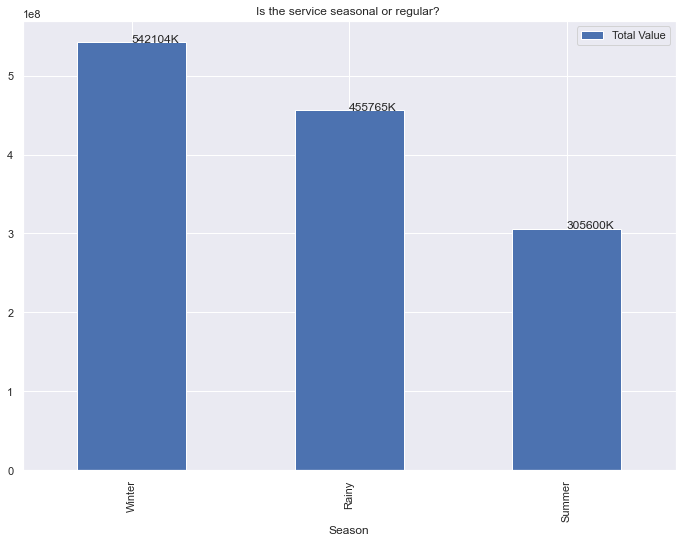

In [485]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
servicesBasedOnSeason = dfInvoice.groupby(["Season"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Season")
servicesBasedOnSeason[:30].plot.bar()
plt.title('Is the service seasonal or regular? ')

for num, counts in enumerate(servicesBasedOnSeason['Total Value'][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.legend()
plt.show()

## Merge with Plant Master.

In [486]:
dfPlantMaster = pd.read_excel(plantmaster_datapath, sep='|' , encoding='latin-1')
dfPlantMaster = dfPlantMaster.rename(columns={"City":"Plant City","State":"Plant State"})
dfPlantMasterNew= dfPlantMaster[["Plant","Plant City","Plant State"]].copy()
dfInvoice = pd.merge(dfInvoice, dfPlantMasterNew , on="Plant",how='left')
dfInvoice

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Season,Plant City,Plant State
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1,Winter,NaN,NaN
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2,Winter,NaN,NaN
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2,Winter,NaN,NaN
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2,Winter,NaN,NaN
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2,Winter,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,NaN,NaN,.,NaN,NaN,NaN,NaN,Chennai,NaN,...,4458.15,NaN,NaN,NaN,NaN,0.00,X405SA1,Rainy,Chennai,Tamil Nadu
492310,984737,NaN,NaN,.,NaN,NaN,NaN,NaN,ADAMBAKKAM,NaN,...,6832.08,NaN,NaN,NaN,NaN,0.00,X405SA1,Rainy,Chennai,Tamil Nadu
492311,984738,NaN,NaN,CHENNAI,NaN,NaN,NaN,NaN,CHENNAI,NaN,...,9187.71,NaN,NaN,NaN,NaN,0.00,X405SA1,Rainy,Chennai,Tamil Nadu
492312,984739,NaN,NaN,"DK NAGAR EXTN,",NaN,NaN,NaN,NaN,"Vijaya Nagar, 1 main road,Velacherr",NaN,...,11100.00,NaN,NaN,NaN,NaN,0.00,X405SA1,Rainy,Chennai,Tamil Nadu


In [487]:
dfInvoice.shape

(492314, 62)

In [488]:
dfInvoice['CITY'] = dfInvoice['CITY'].str.lower() 
dfInvoice['Plant City'] = dfInvoice['Plant City'].str.lower() 

dfInvoice["Same City"] = True
#dfInvoice["Same City"] = dfInvoice["CITY"].equals(dfInvoice["Plant City"])
dfInvoice.shape


(492314, 63)

In [489]:
dfInvoiceCityDifferentThenPlantCity = dfInvoice[dfInvoice["Same City"] == False]

pd.crosstab(dfInvoice["Same City"],dfInvoice["Order Type"] ,margins=True)

Order Type,Accidental,Mechanical,Paid Service,Repeat Order,Running Repairs,SMC Redemption,SMC Value Package,WBW Order,Workshop Damage,All
Same City,,,,,,,,,,
True,44159,15100,135004,3043,269455,15738,9781,17,17,492314
All,44159,15100,135004,3043,269455,15738,9781,17,17,492314


## 17. Customer Segmentation based on group

In [490]:
dfCustomerMaster = pd.read_excel(customer_cleansed_datapath,sheet_name="Sheet1", sep='|' , encoding='latin-1')

In [491]:
dfCustomerMaster.head(5)

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date,Customer Partner Type Name,Customer Data Origin Description,Customer Title,Customer Marital Status,Customer Occupation
0,31,1,1.0,Z001,-1,-1,-1,NaN,NaT,Retail,Camp - Outdoor,Others,Others,Others
1,32,2,1.0,Z005,-1,-1,-1,NaN,NaT,Retail,Reference - Customer,Others,Others,Others
2,34,4,1.0,Z005,-1,2,-1,NaN,NaT,Retail,Reference - Customer,Others,Married,Others
3,35,5,1.0,Z005,-1,-1,-1,NaN,NaT,Retail,Reference - Customer,Others,Others,Others
4,42,7,1.0,Z008,-1,-1,-1,NaN,NaT,Retail,Just Dial/Other helpline,Others,Others,Others


In [492]:
dfInvoice["Customer No."] = dfInvoice["Customer No."].astype('str')
dfInvoice["Customer No."] = dfInvoice["Customer No."].map(lambda x: x.lstrip('0'))


dfCustomerMaster["Customer No."] = dfCustomerMaster["Customer No."].astype('str')


In [493]:
dfCustomerMaster["Customer Occupation"].value_counts()

Others                      548787
Customer                      3254
Self                          1089
Proprietor                     569
Doctor                         272
Director                       251
VIP Customer                   186
Sr. Manager                    153
Manager                        152
Executive                       86
Col                             75
Lt.                             54
Vice President                  50
Junior Manager                  42
Senior Vice President           40
Partner                         33
General Manager                 30
Managing Director               30
Assistant Vice President        29
Executive Assistant             22
Executive Director              21
Capt                            18
CEO                             17
Regional Manager                16
Lt. Gen                         16
Secretary                       15
Vice Chairman                    9
Sr. General Manager              9
DGM                 

In [494]:
dfCustomerMasterNew= dfCustomerMaster[["Customer No.","Customer Partner Type Name","Customer Data Origin Description","Customer Title","Customer Marital Status","Customer Occupation"]].copy()
dfInvoice = pd.merge(dfInvoice, dfCustomerMasterNew , on="Customer No.",how='left')
dfInvoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,User ID,Season,Plant City,Plant State,Same City,Customer Partner Type Name,Customer Data Origin Description,Customer Title,Customer Marital Status,Customer Occupation
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,thane,NaN,...,BC01FS1,Winter,NaN,NaN,True,Retail,Reference - Used car dealer,Mr.,Others,Others
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,thnae,NaN,...,BC01SA2,Winter,NaN,NaN,True,Retail,Camp - Outdoor,Mr.,Others,Others
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,thane[w],NaN,...,BC01SA2,Winter,NaN,NaN,True,Retail,Reference - Customer,Mr.,Others,Others
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,thnae,NaN,...,BC01SA2,Winter,NaN,NaN,True,Retail,Camp - Outdoor,Mr.,Others,Others
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,thane,NaN,...,BC01SA2,Winter,NaN,NaN,True,Retail,Reference - Customer,Others,Others,Others


In [495]:
dfInvoice.shape

(492314, 68)

In [496]:
# pd.crosstab(dfInvoice["Cust Type"],dfInvoice["Customer Data Origin Description"])
# pd.crosstab(dfInvoice["Cust Type"],dfInvoice["Customer Data Origin Description"]).transpose().columns
# seriesCrossTab = pd.crosstab(dfInvoice["Cust Type"],dfInvoice["Customer Data Origin Description"])
# cols = seriesCrossTab.transpose().columns
# for col in cols:
#     print(f"For {col}-->{seriesCrossTab.transpose()[col].argmax()}")

## 17.1 Customer Segmentation based on Customer Type and Order Type

In [497]:
pd.crosstab(dfInvoice["Cust Type"],dfInvoice["Order Type"])

Order Type,Accidental,Mechanical,Paid Service,Repeat Order,Running Repairs,SMC Redemption,SMC Value Package,WBW Order,Workshop Damage
Cust Type,,,,,,,,,
Corporate others,51,10,172,6,334,2,4,0,0
Corporate- M&M,30,2,81,1,135,2,3,0,0
Fleets,181,4,715,6,1311,0,0,0,1
Franchise,0,0,4,0,11,0,0,0,0
Insurance,0,0,0,0,1,0,0,0,0
MFCWL,21,1,118,0,111,1,0,0,0
Retail,43876,15083,133914,3030,267552,15733,9774,17,16


In [498]:
dfInvoice["Customer Occupation"] = dfInvoice["Customer Occupation"].replace('Others', np.nan)
dfInvoice["Customer Marital Status"] = dfInvoice["Customer Marital Status"].replace('Others', np.nan)
dfInvoice["Customer Title"] = dfInvoice["Customer Title"].replace('Others', np.nan)
dfInvoice["Customer Title"] = dfInvoice["Customer Data Origin Description"].replace('Others', np.nan)

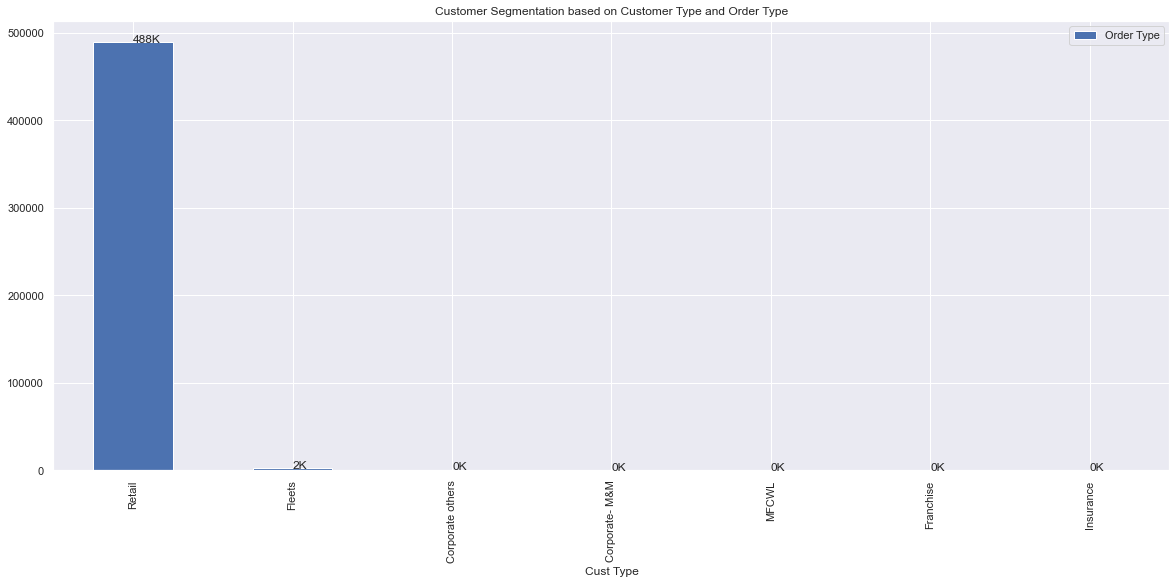

In [499]:
sns.set(rc={'figure.figsize':(20,8.27)})
custTypeOrderTypeSegmentation = dfInvoice.groupby(["Cust Type"])['Order Type'].count().reset_index().sort_values("Order Type", ascending=False).set_index("Cust Type")
custTypeOrderTypeSegmentation[:30].plot.bar()
plt.title('Customer Segmentation based on Customer Type and Order Type')

for num, counts in enumerate(custTypeOrderTypeSegmentation['Order Type'][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.legend()
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
custTypeOrderTypeSegmentation = dfInvoice.groupby(["Cust Type"])['Order Type'].count().reset_index().sort_values("Order Type", ascending=False).set_index("Cust Type")
custTypeOrderTypeSegmentation[:30].plot.bar()
plt.title('Customer Segmentation based on Customer Type and Order Type')

for num, counts in enumerate(custTypeOrderTypeSegmentation['Order Type'][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.legend()
plt.show()

## 17.2 Customer Segmentation based on Customer Type and Total value of the service

In [500]:
custTypeTotalSegmentation = dfInvoice.groupby(["Cust Type"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Cust Type")/dfInvoice["Total Value"].sum()*100
custTypeTotalSegmentation

,Total Value
Cust Type,
Retail,98.500811
Fleets,0.943649
Corporate others,0.314258
Corporate- M&M,0.175308
MFCWL,0.065649
Insurance,0.000325
Franchise,0.000000


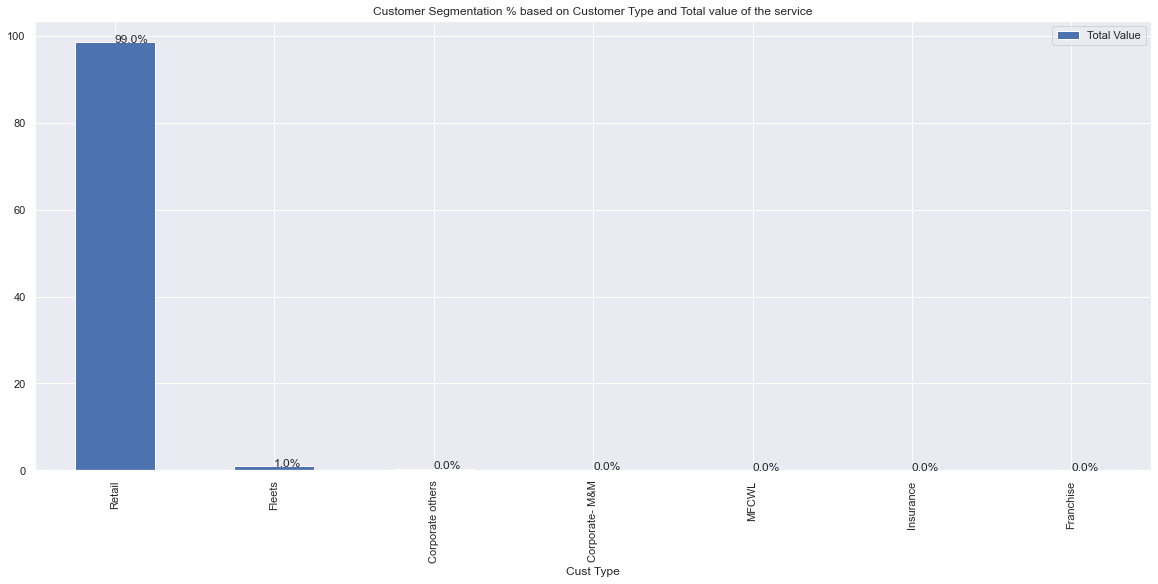

In [501]:
sns.set(rc={'figure.figsize':(20,8.27)})
custTypeTotalSegmentation = dfInvoice.groupby(["Cust Type"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Cust Type")/dfInvoice["Total Value"].sum()*100
custTypeTotalSegmentation[:10].plot.bar()
plt.title('Customer Segmentation % based on Customer Type and Total value of the service')

for num, counts in enumerate(custTypeTotalSegmentation['Total Value'][:10]):
    plt.text(num, counts, s = format((np.round(counts))) + "%")

plt.legend()
plt.show()

## 17.3 Customer Segmentation based on Customer Occupation and Total value of the service

In [502]:
custOccupationTotalSegmentation = dfInvoice.groupby(["Customer Occupation"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Customer Occupation")
custOccupationTotalSegmentation

,Total Value
Customer Occupation,
Self,838767.96
Customer,734180.73
Doctor,491902.67
Director,360434.03
Junior Manager,263479.03
Proprietor,203933.06
Manager,200945.27
Col,124507.65
Sr. Manager,107816.83


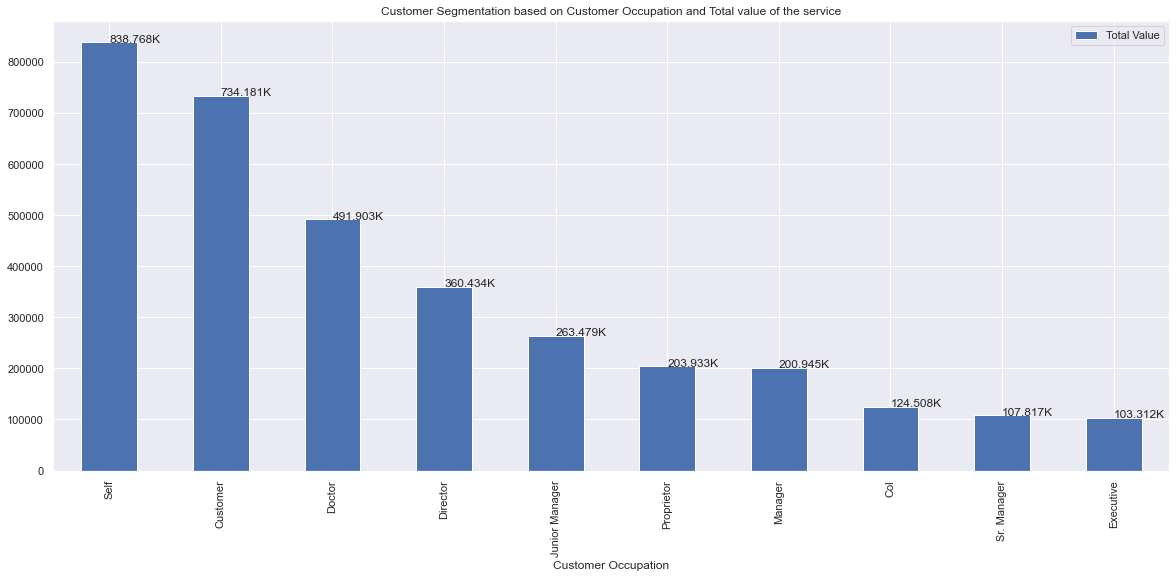

In [503]:
sns.set(rc={'figure.figsize':(20,8.27)})
custOccupationTotalSegmentation = dfInvoice.groupby(["Customer Occupation"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Customer Occupation")
custOccupationTotalSegmentation[:10].plot.bar()
plt.title('Customer Segmentation based on Customer Occupation and Total value of the service')

for num, counts in enumerate(custOccupationTotalSegmentation['Total Value'][:10]):
    plt.text(num, counts, s = format((np.round(counts)/1000)) + "K")

plt.legend()
plt.show()

## 17.4 Customer Segmentation based on Customer Data Origin and Total value of the service

In [504]:
dfDistribution = dfInvoice.groupby(["Customer Data Origin Description"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Customer Data Origin Description")/dfInvoice["Total Value"].sum()*100
dfDistribution

,Total Value
Customer Data Origin Description,
Camp - Outdoor,23.002299
Reference - Customer,17.894636
Reference - Employee,15.067250
Camp - Workshop,6.133830
Just Dial/Other helpline,5.946325
Other outdoor activity,5.730234
Spotted the outlet,5.076437
Insurance Company,4.222837
Outdoor Sales Activity,3.612769


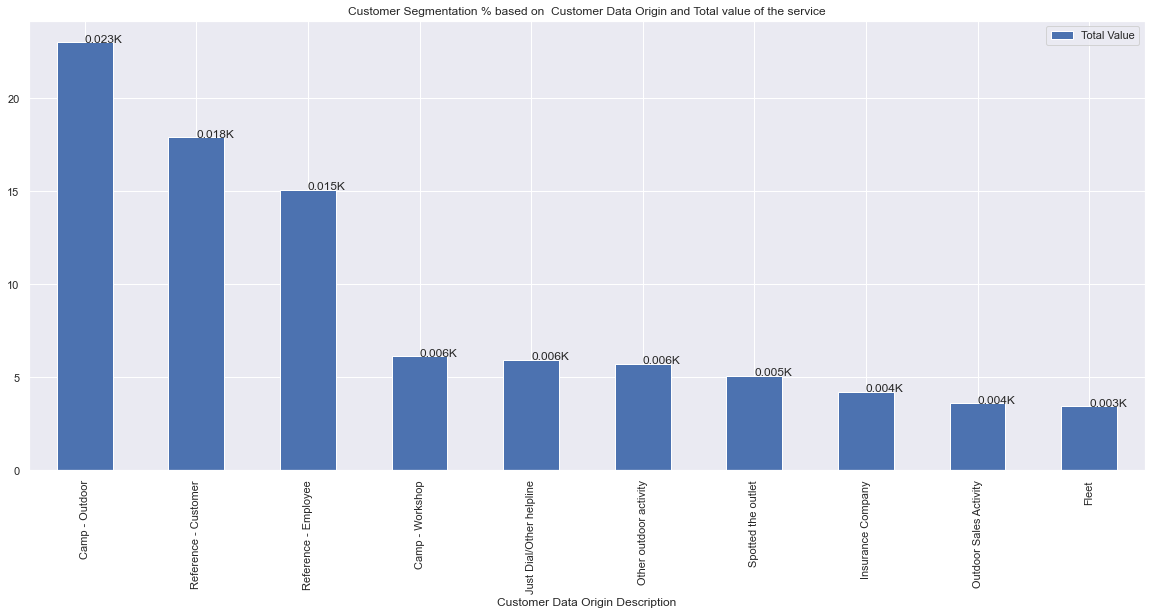

In [505]:
sns.set(rc={'figure.figsize':(20,8.27)})
custDataOriginTotalSegmentation = dfInvoice.groupby(["Customer Data Origin Description"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Customer Data Origin Description")/dfInvoice["Total Value"].sum()*100
custDataOriginTotalSegmentation[:10].plot.bar()
plt.title('Customer Segmentation % based on  Customer Data Origin and Total value of the service')

for num, counts in enumerate(custDataOriginTotalSegmentation['Total Value'][:10]):
    plt.text(num, counts, s = format((np.round(counts)/1000)) + "K")

plt.legend()
plt.show()

## 17.5 Customer Segmentation based on Customer Partner Type  and Total value of the service

In [506]:
custPartnerTypeTotalSegmentation = dfInvoice.groupby(["Customer Partner Type Name"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Customer Partner Type Name")/dfInvoice["Total Value"].sum()*100
custPartnerTypeTotalSegmentation

,Total Value
Customer Partner Type Name,
Retail,97.616569
Corporate,0.823983
Others,0.735986
Fleet,0.512336
Insurance Company,0.134554
Employee,0.098894
Contact Person,0.076355
Surveyor,0.001324


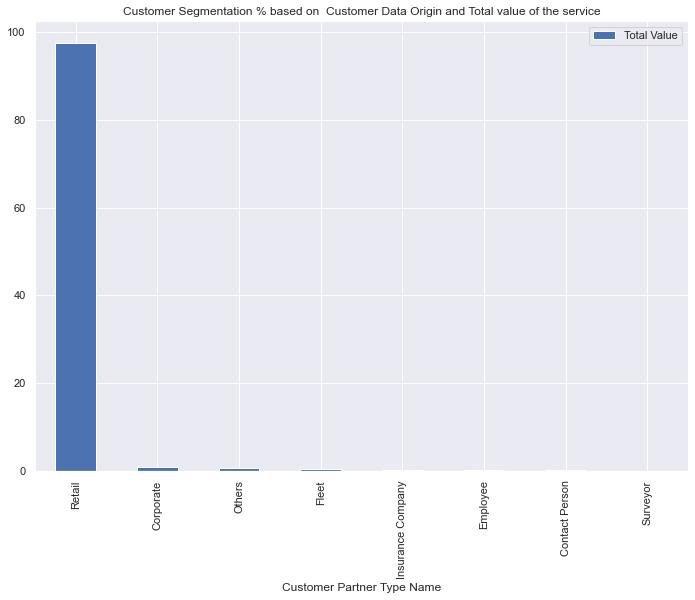

In [507]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
custPartnerTypeTotalSegmentation = dfInvoice.groupby(["Customer Partner Type Name"])['Total Value'].sum().reset_index().sort_values("Total Value", ascending=False).set_index("Customer Partner Type Name")/dfInvoice["Total Value"].sum()*100
custPartnerTypeTotalSegmentation[:30].plot.bar()
plt.title('Customer Segmentation % based on  Customer Data Origin and Total value of the service')
plt.legend()
plt.show()

In [508]:
dfInvoice.shape

(492314, 68)

## 17.6 Technician who did the highest number of Services

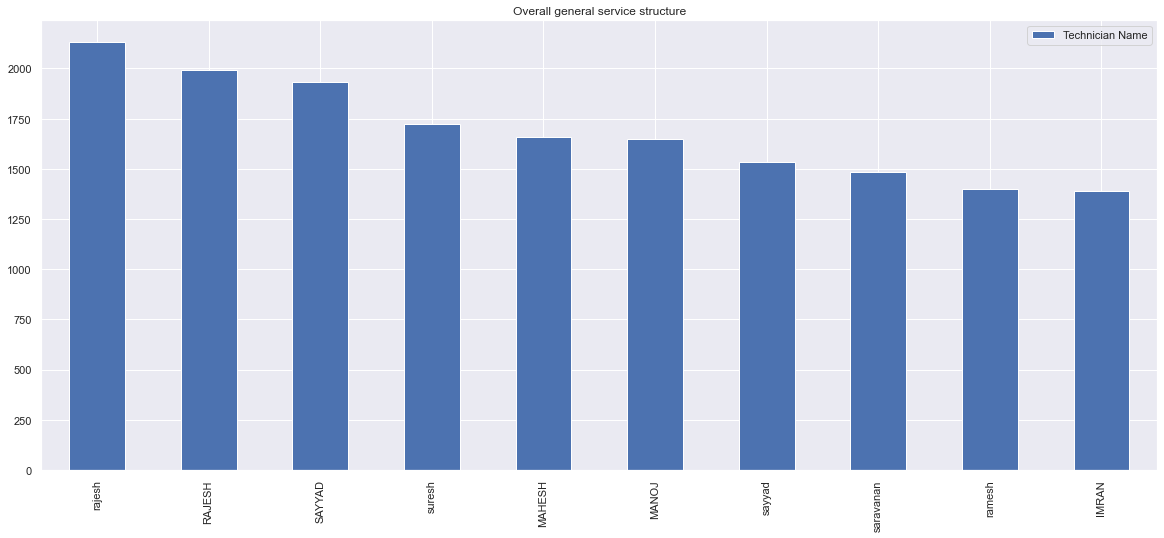

In [509]:
sns.set(rc={'figure.figsize':(20,8.27)})

dfInvoice["Technician Name"] = dfInvoice["Technician Name"].replace('nan', np.nan)
TechnicianSeries = dfInvoice["Technician Name"].value_counts(dropna=True)
TechnicianSeries[:10].plot.bar()
plt.title('Overall general service structure')
plt.legend()
plt.show()

In [510]:
dfInvoice['Technician Name Copy'] = dfInvoice['Technician Name']
dfInvoice.groupby(["Plant Name1","Technician Name Copy"])['Technician Name'].count().reset_index().sort_values("Technician Name", ascending=False)

,Plant Name1,Technician Name Copy,Technician Name
4648,NAGPUR,SAYYAD,1935
4795,NAGPUR,sayyad,1534
1368,FARIDABAD 1,pankaj,1238
5316,NASHIK,JK,1146
9819,THANE,HARSHAD,1100
...,...,...,...
10641,X006 - A.M.MOTORS,HARISH BHAI,1
10642,X006 - A.M.MOTORS,HARISH.,1
10643,X006 - A.M.MOTORS,HARISH/IQBAL,1
10644,X006 - A.M.MOTORS,IKBAL,1


In [511]:
TechnicianSegmentationNagpur = dfInvoice[(dfInvoice["Plant Name1"]=="NAGPUR")]['Technician Name'].value_counts()
TechnicianSegmentationNagpur

SAYYAD           1935
sayyad           1534
gurjeet          1099
ali               993
diraj             719
                 ... 
ajay                1
sayyad /yasin       1
gurjjet             1
DHIRAJA             1
shyam,              1
Name: Technician Name, Length: 291, dtype: int64

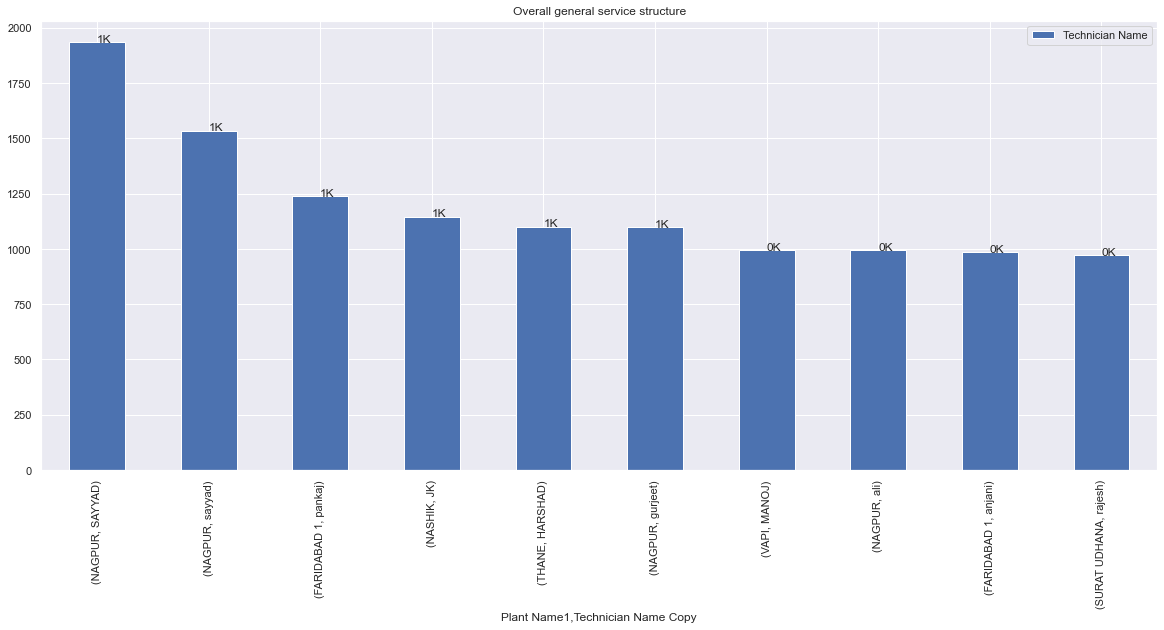

In [512]:
sns.set(rc={'figure.figsize':(20,8.27)})
dfInvoice['Technician Name Copy'] = dfInvoice['Technician Name']
TechnicianSegmentation = dfInvoice.groupby(["Plant Name1","Technician Name Copy"])[['Technician Name']].count().sort_values("Technician Name", ascending=False)
TechnicianSegmentation[:10].plot.bar()

for num, counts in enumerate(TechnicianSegmentation['Technician Name'][:10]):
    plt.text(num, counts, s = format(int(np.round(counts)/1000)) + "K")

plt.title('Overall general service structure')
dfInvoice.drop(["Technician Name Copy"],inplace=True,axis=1)
plt.legend()
plt.show()

## 

## 

## 

## 

In [513]:
## 

In [514]:

dfInvoice.to_csv(cleansed_invoice_datapath, index=False) 

In [515]:
## Which services are most  have most cars coming for repair based on the Make and Model ?